## Task - 04

# Problem Statement

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os

# Loading the Dataset

In [6]:
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_test=pd.read_excel("C:\\Users\\nimisha\\Downloads\\Twitter_data.xlsx", names=col)

In [7]:
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


# Data Overview

In [8]:
df_train.shape

(74681, 4)

In [9]:
df_train.columns

Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Data Cleaning

In [11]:
df_train.dtypes

Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [12]:
df_train.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [13]:
df_train.dropna(subset=['Content'] , inplace=True)

In [14]:
df_train.shape

(73995, 4)

In [15]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [16]:
df_train.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_test.Sentiment=df_test.Sentiment.replace('Irrelevant' , 'Neutral')

In [17]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [18]:
df_test.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

# Exploratary Data Analysis

In [19]:
sentiment_count=df_train.Sentiment.value_counts()
sentiment_count

Sentiment
Neutral     30983
Negative    22358
Positive    20654
Name: count, dtype: int64

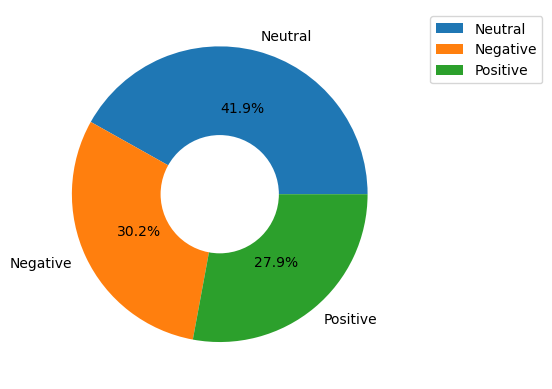

In [20]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
df_train.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [22]:
Entity_count=df_train.Entity.value_counts()
Entity_count

Entity
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

In [23]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [24]:
Entity_top10=Entity_sort.head(10)
Entity_top10

Entity
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64

In [25]:
Entity_index=Entity_top10.index

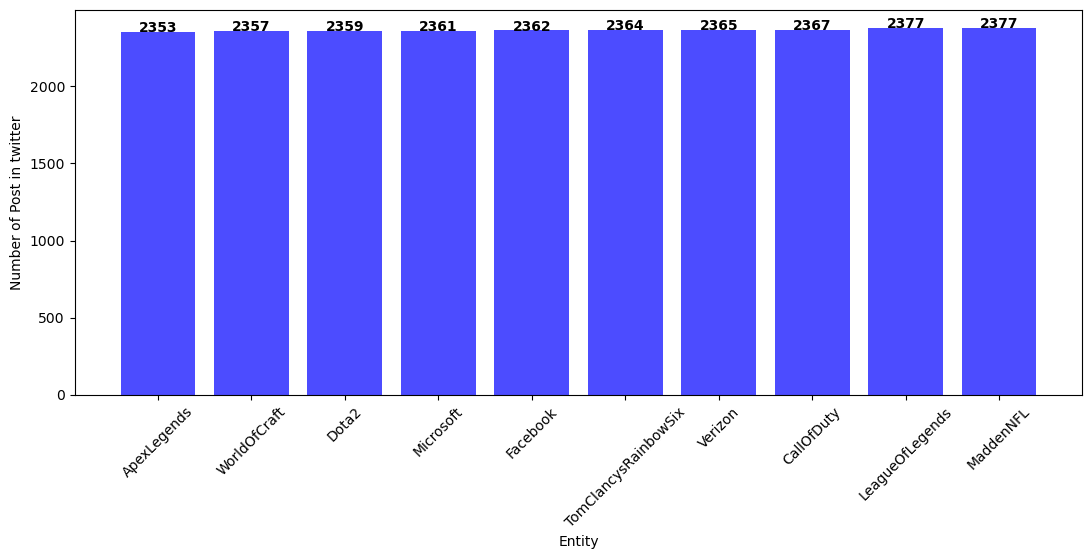

In [26]:
plt.figure(figsize=(13,5))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#0000FF')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )
    
plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

In [27]:
Entity_top3_df=Entity_sort.head(3)
Entity_top3_df

Entity
MaddenNFL          2377
LeagueOfLegends    2377
CallOfDuty         2376
Name: count, dtype: int64

In [28]:
Entity_top3=Entity_top3_df.index.tolist()
Entity_top3

['MaddenNFL', 'LeagueOfLegends', 'CallOfDuty']

In [29]:
sentiment_by_entity=df_train.loc[df_train['Entity'].isin(Entity_top3)].groupby('Entity')['Sentiment'].value_counts().sort_index()
sentiment_by_entity

Entity           Sentiment
CallOfDuty       Negative      883
                 Neutral      1047
                 Positive      446
LeagueOfLegends  Negative      632
                 Neutral      1130
                 Positive      615
MaddenNFL        Negative     1694
                 Neutral       287
                 Positive      396
Name: count, dtype: int64

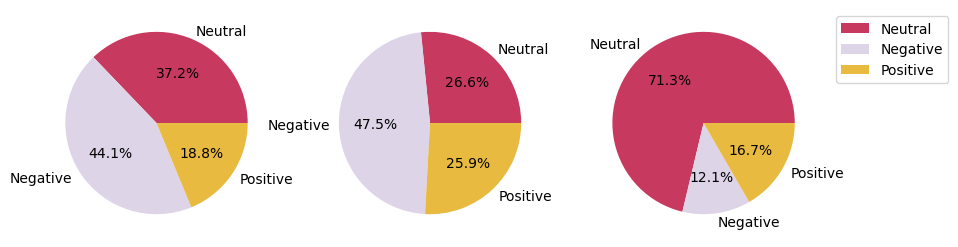

In [30]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#C7395F' , '#DED4E8' , '#E8BA40']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_entity[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")